# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [99]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test/2:], newsgroups_test.target[num_test/2:]
dev_data, dev_labels = newsgroups_test.data[:num_test/2], newsgroups_test.target[:num_test/2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print 'training label shape:', train_labels.shape
print 'test label shape:', test_labels.shape
print 'dev label shape:', dev_labels.shape
print 'labels names:', newsgroups_train.target_names

training label shape: (2034L,)
test label shape: (677L,)
dev label shape: (676L,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
/n


(1) For each of the first 5 training examples, print the text of the message along with the label.

[2 pts]

In [101]:
def P1(num_examples):
### STUDENT START ###
    for i in range(0,num_examples):
        print "example No: " + str(i+1)
        #show the label for the message
        print "label: " + str(train_labels[i])
        #show the category
        print "category: " + str(newsgroups_train.target_names[train_labels[i]])
        #show the text for the message
        print "text: " + str(train_data[i])+ "\n"
        print "--------------------------------------"

### STUDENT END ###
P1(5)

example No: 1
label: 1
category: comp.graphics
text: Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych

--------------------------------------
example No: 2
label: 3
category: talk.religion.misc
text: 

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.




(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

[6 pts]

In [438]:
def P2():
### STUDENT START ###
    ########################################################
    #Part A
    #singleGram
    vectorizer = CountVectorizer()
    #bin words, 
    X = vectorizer.fit_transform(train_data)
    #Convert to matrix
    #X.toarray()
    print "Question 2a"
    print "The size of the vocabulary (single grams) is:  " + str(X.shape[1])
    
    print "The average number of non-zero features per example is: ",
    #calc missing values over total number of examples
    print X.nnz/float(X.shape[0]) #shows 196,700 words
    
    print "The fraction of the entries in the matrix that are non-zero is:",
    #Calc Sparsity 
    print str((X.nnz)/float(X.shape[0]*X.shape[1]))+ "\n"
    
    ########################################################
    #Part B
    print "Question 2b" 
    feature_names =vectorizer.get_feature_names()
    print "The 0th feature is: " + str((feature_names[0]))
    print "The last feature is: " + str(feature_names[-1]) +"\n"
    
    ########################################################
    #Part C
    print "Question 2c" 
    #Create new vocab list
    vocab = ["atheism", "graphics", "space", "religion"]
    #binarize it
    vocab_array = vectorizer.fit_transform(vocab) #.toarray()
    #apply bins to training dataset
    vocab_2_data = vectorizer.transform(train_data) #.toarray()
    #calc blank rate and overall shape
    print "The average number of non-zero features per example (with new 4 word vocab) is: ",
    print  str((vocab_2_data.nnz/float(vocab_2_data.shape[0]))) + "\n"
        
    ########################################################
    #Part D
    print "Question 2d" 
    #for words, Bi and TriGrams
    bigram_vectorizer = CountVectorizer(analyzer='char',ngram_range=(2, 3),token_pattern=r'\b\w+\b', min_df=1)

    #bin words and convert to matrix
    X_2 = bigram_vectorizer.fit_transform(train_data)#.toarray()
    X_2
    print "Bigrams and trigrams result in a vocabulary of size: " + str(X_2.shape[1]) + "\n"
    
    ########################################################
    #Part E
    print "Question 2e" 
    #for words, Bi and TriGrams
    bigram_vectorizer = CountVectorizer(min_df=10)

    #bin words and convert to matrix
    X_2 = bigram_vectorizer.fit_transform(train_data)#.toarray()
    X_2
    print "Words with at least 10 instances result in a vocabulary of size: " + str(X_2.shape[1]) + "\n"
    
    ########################################################
    #Part F
    print "Question 2f" 
    X = vectorizer.fit_transform(dev_data)
    dev_feature_names =vectorizer.get_feature_names()
    missing = 0
    for i in range(0,len(dev_feature_names)):
        if dev_feature_names[i] not in (feature_names):
            missing += 1
    print "The fraction of the words in the dev data  missing from the vocabulary is:  " + str(float(missing)/X.shape[1])
    
    ### STUDENT END ###
P2()

Question 2a
The size of the vocabulary (single grams) is:  26879
The average number of non-zero features per example is:  96.7059980334
The fraction of the entries in the matrix that are non-zero is: 0.00359782722696

Question 2b
The 0th feature is: 00
The last feature is: zyxel

Question 2c
The average number of non-zero features per example (with new 4 word vocab) is:  0.268436578171

Question 2d
Bigrams and trigrams result in a vocabulary of size: 35478

Question 2e
Words with at least 10 instances result in a vocabulary of size: 3064

Question 2f
The fraction of the words in the dev data  missing from the vocabulary is:  0.247876400345


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

[4 pts]

In [338]:
def P3():
    ### STUDENT START ###
    ##################################################
    #create n grams
    #default CountVectorizer options 
    #singleGram
    vectorizer = CountVectorizer()
    train_vec = vectorizer.fit_transform(train_data).toarray()
    #train_vec.shape
    #train_array = train_vec.toarray()
    #print train_array [1:20,]
    test_vec = vectorizer.transform(test_data)
    #print test_vec.shape

    ##################################################
    #Build KNN model
    #report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier;
    #find the optimal value for k. 
    knn_model = KNeighborsClassifier()
    n_neighbors = {'n_neighbors': [1, 3, 5, 7, 9, 15]} 
    #sklearn library required a more explicit measure (ie f1 alone implies binary results and this is a multi class problem)
    grid = GridSearchCV(estimator=knn_model, param_grid=n_neighbors, scoring = "f1_weighted")
    grid.fit(train_vec, train_labels)

    # summarize the results of the grid search
    print "KNN best f1 score on Training Data: " + str(grid.best_score_)
    print "KNN best nearest neighbor count: " + str(grid.best_estimator_.n_neighbors) + "\n"

    ##################################################
    #Build MNB model
    #Multinomial Naive Bayes model and find the optimal value for alpha. 
    #gnb_model = BernoulliNB(binarize=0.5) #binarizer function is cutting off here!!
    alphas = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
    grid = GridSearchCV(estimator=clf_model, param_grid=alphas, scoring = "f1_weighted")
    grid.fit(train_vec, train_labels)
    #print(grid)
    # summarize the results of the grid search
    print "Multinomial NB Model best F1: " + str((grid.best_score_))
    print "Multinomial NB Model best Alpha: " +str (grid.best_estimator_.alpha) + "\n"


    #clf_pred = clf_model.fit(train_vec, train_labels, alpha = grid.best_estimator_.alpha).predict(test_vec)
    #wrong_prediction = (clf_pred != test_labels)
    #print "Multinomial NB Model - Score on Test Pred: ",
    #print clf_model.metrics.f1_score


    ##################################################
    #Build LR model
    #fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization.
    #LR Model
    regularization_c = {'C': [0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99,1]} #5,10,100]} #added 0.25 and 0.75 after seeing that 0.5 performed well, dropped above 1 at that point too
    LR_model = LogisticRegression(penalty="l2")
    grid = GridSearchCV(estimator=LR_model, param_grid=regularization_c, scoring = "f1_weighted")
    grid.fit(train_vec, train_labels)
    #summarize the results of the grid search
    print "Logistic Regression best f1 score for training data: " + str(grid.best_score_)
    print "Logistic Regression best regularization parameter: "+ str(grid.best_estimator_.C)


### STUDENT END ###
P3()

KNN best f1 score on Training Data: 0.417778915182
KNN best nearest neighbor count: 15

Multinomial NB Model best F1: 0.828718198342
Multinomial NB Model best Alpha: 0.01

Logistic Regression best f1 score for training data: 0.767943492932
Logistic Regression best regularization parameter: 0.25


In [578]:
def P3(regularization_c, accuracies):

### STUDENT START ###
    #iterate over different regularization weights
    for c_size in (regularization_c):
        #builds model
        LR_model = LogisticRegression(penalty="l2", C = c_size)
        LR_model.fit(train_vec, train_labels)
        
        #makes predictions on the dev dataset with the model I just built
        test_predicted_labels = LR_model.predict(test_vec)

        #accuracy Calcs
        wrong_prediction = (test_predicted_labels != test_labels)
        print "Regularization weight: " + str(c_size), 
        
        #each column is a word
        features = LR_model.coef_
        
        category_calc = []
        #sum of the squared weight values for each class
        for row in range(0,4):
            calc_SSE = round(sum(features[row]**2),2)
            category_calc.append(calc_SSE)
        print category_calc

### STUDENT END ###
regularization_c = [0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99,1,10,100]
P3(regularization_c, accuracies)

Regularization weight: 0.0001 [0.01, 0.01, 0.01, 0.01]
Regularization weight: 0.001 [0.17, 0.2, 0.18, 0.19]
Regularization weight: 0.01 [2.54, 2.94, 2.86, 2.25]
Regularization weight: 0.1 [27.13, 24.65, 27.46, 23.02]
Regularization weight: 0.25 [59.82, 50.57, 58.94, 51.47]
Regularization weight: 0.5 [102.61, 83.1, 99.03, 89.01]
Regularization weight: 0.75 [137.33, 108.97, 130.93, 119.53]
Regularization weight: 0.9 [155.64, 122.51, 147.62, 135.68]
Regularization weight: 0.99 [165.83, 130.06, 156.96, 144.76]
Regularization weight: 1 [166.96, 130.87, 158.04, 145.7]
Regularization weight: 10 [586.68, 447.94, 540.36, 530.79]
Regularization weight: 100 [1405.64, 1083.91, 1295.47, 1309.35]


ANSWER:

a. Why doesn't nearest neighbors work well for this problem? Maybe there is too much noise with overlapping basic words that makes 2 pieces of text seem more similar than they really are. Every word has an even weight and the text excerpts vary quite a bit in length. The longest excerpts will have lots of pull in this model because it will show lots of neighbors near it.

b. Any ideas why logistic regression doesn't work as well as Naive Bayes? Logistic regression doesn't handle lots of features especially well in this instance because the model is overfitting the data--its allocating all of the variance to the possible words so the model isn't generalizing well. NB  banks on the independance of features, and obviously we know that words are not independent so perhaps NB captures the relationship between words better.

c. The higher the regularization weight (C), the larger the the sum of the squared weight values is for all classes. The regularization term de-emphasizes features that don't add much value when it is lower, when it's larger it looks like it amplyfies the noise associated with larger features.

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

[5 pts]

In [847]:
#def P4():
### STUDENT START ###
##############################################
#single grams
vectorizer = CountVectorizer()
train_vec = vectorizer.fit_transform(train_data).toarray()
test_vec = vectorizer.transform(test_data)

#fit model
LR_model = LogisticRegression(penalty="l2", C = 0.25)
LR_model.fit(train_vec, train_labels)

#model outputs
df_features2 = LR_model.coef_#**2 #LR model coefficents

#grab the location of the top 5 highest weighted features
high_weight_features = []
#looking at every class (has its own row in the coef table)
for category in range(0,4):
    #select top 5
    top_5 = df_features2[category,].argsort()[-5:]
    high_weight_features.append(top_5) #works sorta

#merge the classes index into 1 array with all weights ...took forever :(
hw_features2 = np.concatenate(high_weight_features, axis=0 )
#grab all feature names
feature_names = vectorizer.get_feature_names()
#select just the feature names with the top 5 weights for each class
top20_name = [feature_names[match]for match in hw_features2]

all_weights = []
#figure out the weights by class
for category in range(0,4):
    #based on the location of the top 20 words, grab the weights for all 4 classes
    selected_feature_weights = [df_features2[category,match]for match in hw_features2] 
    all_weights.append(selected_feature_weights)

#display results
print "For Single Grams the largest coefficients are: " + "\n"
for table_row in range(0,19):
    print('Word: {} Weights: {}'.format(top20_name[table_row], [all_weights[w_class][table_row] for w_class in range(0,4)]))
print "\n"
##############################################
#bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2),token_pattern=r'\b\w+\b', min_df=1)
train_vec = vectorizer.fit_transform(train_data)

#fit model
LR_model = LogisticRegression(penalty="l2", C = 0.25)
LR_model.fit(train_vec, train_labels)

#model outputs
df_features2 = LR_model.coef_#**2 #LR model coefficents

#grab the location of the top 5 highest weighted features
high_weight_features = []
#looking at every class (has its own row in the coef table)
for category in range(0,4):
    #select top 5
    top_5 = df_features2[category,].argsort()[-5:]
    high_weight_features.append(top_5) #works sorta

#merge the classes index into 1 array with all weights ...took forever :(
hw_features2 = np.concatenate(high_weight_features, axis=0 )
#grab all feature names
feature_names = vectorizer.get_feature_names()
#select just the feature names with the top 5 weights for each class
top20_name = [feature_names[match]for match in hw_features2]

all_weights = []
#figure out the weights by class
for category in range(0,4):
    #based on the location of the top 20 words, grab the weights for all 4 classes
    selected_feature_weights = [df_features2[category,match]for match in hw_features2]
    all_weights.append(selected_feature_weights)

#display results
print "For Bi Grams the largest coefficients are: " + "\n"
for table_row in range(0,19):
    print('Word: {} Weights: {}'.format(top20_name[table_row], [all_weights[w_class][table_row] for w_class in range(0,4)] )) #"\n"

### STUDENT END ###
#P4()

For Single Grams the largest coefficients are: 

Word: islam Weights: [0.5626598225609315, -0.096437246818030883, -0.22978479966498122, -0.23218009366290771]
Word: religion Weights: [0.65749378379442469, -0.41028416048634436, -0.5368068142314395, -0.027741687834087033]
Word: atheism Weights: [0.65759212874908901, -0.28775739635287129, -0.28983536964840989, -0.32727431010786706]
Word: atheists Weights: [0.65808007448616868, -0.088839093568503238, -0.21784519599450225, -0.46821568726086965]
Word: bobby Weights: [0.66738900181130212, -0.16083052982041462, -0.23296011793374236, -0.31522740046997122]
Word: computer Weights: [0.010951133758741419, 0.71857499755616561, -0.46059518267122407, -0.31695221808993906]
Word: 3d Weights: [-0.24901624968313446, 0.7653297520676754, -0.45054120989405888, -0.25688045920357394]
Word: file Weights: [-0.22731562169933098, 0.86641302291813993, -0.56506648896441303, -0.40272638187737492]
Word: image Weights: [-0.3705846564315744, 0.89927950456592565, -0.53032

ANSWER: Its really surprising how much overlap there is in the bigram table across topics (ex "cheers kent") Kent is not a particularly common last name, but maybe it's someone important the in the religous world(?). I'm not surprised by the limited overlap between the 2 tables and the high volume of small words in the bigram table.

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

[4 pts]

In [750]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
### STUDENT START ###
    #to lower
    s = s.lower()
    #removes paragraphs/tabs etc (?) matches any word character (equal to [a-zA-Z0-9_]); increases accuracy
    s = re.sub(r'[^\w]', ' ',s)
    #replace all numbers
    s = re.sub("\d+", "NUM", s)
    #Remove special characters; finds any whitespace character 
    s = re.sub('^\s[^A-Za-z0-9]+',"",s)
    
    #white noise words; ubiquitious and of little value
    #taken from https://github.com/postgres/postgres/tree/master/src/backend/snowball/stopwords
    stopwords = ['i','me','my','myself','we','our','ours','ourselves','you','your','yours','yourself','yourselves','he','him','his','himself','she','her','hers','herself','it','its','itself','they','them','their','theirs','themselves','what','which','who','whom','this','that','these','those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing','a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against','between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off','over','under','again','further','then','once','here','there','when','where','why','how','all','any','both','each','few','more','most','other','some','such','no','nor','not','only','own','same','so','than','too','very','s','t','can','will','just','don','should','now']

    #remove stop words
    for word in stopwords:
        s= re.sub("\s"+ word +"\s", " ", s)
        
    #stemming; made it way worse, not surprising--I've never had good experience with it
    #s= re.sub("ing" +"\s", "", s)
    #s= re.sub("ly" +"\s", "", s)
    #s= re.sub("s" +"\s", "", s)
    
    #removing large words  ##several combos made it worse
    #s = re.sub(r'\W*\b\w{9,15}\b', "", s)
    
    #removing small words  ##also made it worse
    #s = re.sub(r'\W*\b\w{1,2}\b', "", s)
    
    return s


### STUDENT END ###

def P5():
### STUDENT START ###
    #################################################
    #Vanilla vectorizing
    vanilla_vectorizer = CountVectorizer(preprocessor=empty_preprocessor)
    vanilla_train_vec = vanilla_vectorizer.fit_transform(train_data).toarray()
    vanilla_dev_vec = vanilla_vectorizer.transform(dev_data)
    
    #vocab size
    print "No Preprocessing vocabulary size: " + str(vanilla_train_vec.shape[1])
    
    #Model with no preprocessing 
    vanilla_LR_model = LogisticRegression(penalty="l2", C = 0.2)
    vanilla_LR_model.fit(vanilla_train_vec, train_labels)
    
    #makes predictions on the dev dataset with the model I just built
    vanilla_test_pred_labels = vanilla_LR_model.predict(vanilla_dev_vec)
    
    #accuracy Calcs (using f1 for multiclass problem + LR model)
    vanilla_f1 = metrics.f1_score(vanilla_test_pred_labels, dev_labels)
    print "No Preprocessing  f1: " + str(vanilla_f1) 
    
    #################################################
    #Special Preprocessing ---seriously missing nltk library :(
    special_vectorizer = CountVectorizer(preprocessor=better_preprocessor)
    special_train_vec = special_vectorizer.fit_transform(train_data).toarray()
    special_dev_vec = special_vectorizer.transform(dev_data)
    
    #vocab size
    print "Special Preprocessing vocabulary size: " + str(special_train_vec.shape[1])
    
    #Model with no preprocessing 
    special_LR_model = LogisticRegression(penalty="l2", C = 0.2)
    special_LR_model.fit(special_train_vec, train_labels)
    
    #makes predictions on the dev dataset with the model I just built
    special_test_pred_labels = special_LR_model.predict(special_dev_vec)
    
    #accuracy Calcs (using f1 for multiclass problem + LR model)
    special_f1 = metrics.f1_score(special_test_pred_labels, dev_labels)
    print "Special Preprocessing  f1: " + str(special_f1)

### STUDENT END ###
P5()

No Preprocessing vocabulary size: 33291


C:\Users\N0209810\.conda\envs\my_root\lib\site-packages\sklearn\metrics\classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


No Preprocessing  f1: 0.714551506596
Special Preprocessing vocabulary size: 24718
Special Preprocessing  f1: 0.734435367357


C:\Users\N0209810\.conda\envs\my_root\lib\site-packages\sklearn\metrics\classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


In [752]:
print "pre processing vocab reduction of: " + str(33291-24718)
print "f1 increased by: " + str((0.734435367357-0.714551506596)*100)+"%"
print "which really rounds to 2"

pre processing vocab reduction of: 8573
f1 increased by: 1.9883860761%


(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

[4 pts]

L2 penalty has 107516 number of non-zero weights
L1 penalty has 5 number of non-zero weights
(2034L, 2L)
Regularization weight: 0.0010.373860544704


C:\Users\N0209810\.conda\envs\my_root\lib\site-packages\sklearn\metrics\classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


L2 penalty has 107516 number of non-zero weights
L1 penalty has 35 number of non-zero weights
(2034L, 16L)
Regularization weight: 0.010.497324048797


C:\Users\N0209810\.conda\envs\my_root\lib\site-packages\sklearn\metrics\classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


L2 penalty has 107516 number of non-zero weights
L1 penalty has 364 number of non-zero weights
(2034L, 211L)
Regularization weight: 0.10.689499026459


C:\Users\N0209810\.conda\envs\my_root\lib\site-packages\sklearn\metrics\classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


L2 penalty has 107516 number of non-zero weights
L1 penalty has 747 number of non-zero weights
(2034L, 434L)
Regularization weight: 0.250.697910279953


C:\Users\N0209810\.conda\envs\my_root\lib\site-packages\sklearn\metrics\classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


L2 penalty has 107516 number of non-zero weights
L1 penalty has 1227 number of non-zero weights
(2034L, 739L)
Regularization weight: 0.50.68169704313


C:\Users\N0209810\.conda\envs\my_root\lib\site-packages\sklearn\metrics\classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


L2 penalty has 107516 number of non-zero weights
L1 penalty has 1623 number of non-zero weights
(2034L, 955L)


C:\Users\N0209810\.conda\envs\my_root\lib\site-packages\sklearn\metrics\classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


Regularization weight: 0.750.672120257
L2 penalty has 107516 number of non-zero weights
L1 penalty has 1691 number of non-zero weights
(2034L, 1012L)


C:\Users\N0209810\.conda\envs\my_root\lib\site-packages\sklearn\metrics\classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


Regularization weight: 0.90.678046380066
L2 penalty has 107516 number of non-zero weights
L1 penalty has 1762 number of non-zero weights
(2034L, 1035L)


C:\Users\N0209810\.conda\envs\my_root\lib\site-packages\sklearn\metrics\classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


Regularization weight: 0.990.691485159381
L2 penalty has 107516 number of non-zero weights
L1 penalty has 1853 number of non-zero weights
(2034L, 1094L)


C:\Users\N0209810\.conda\envs\my_root\lib\site-packages\sklearn\metrics\classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


Regularization weight: 10.689451523678
L2 penalty has 107516 number of non-zero weights
L1 penalty has 6025 number of non-zero weights
(2034L, 3181L)


C:\Users\N0209810\.conda\envs\my_root\lib\site-packages\sklearn\metrics\classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


Regularization weight: 100.696609512994
L2 penalty has 107516 number of non-zero weights
L1 penalty has 18287 number of non-zero weights
(2034L, 7692L)
Regularization weight: 1000.68999404115
[0.37386054470403646, 0.49732404879702524, 0.68949902645894545, 0.69791027995339461, 0.68169704312969825, 0.67212025699972733, 0.67804638006551043, 0.69148515938108301, 0.68945152367781537, 0.69660951299423712, 0.68999404114988505]
[5, 35, 364, 747, 1227, 1623, 1691, 1762, 1853, 6025, 18287]


C:\Users\N0209810\.conda\envs\my_root\lib\site-packages\sklearn\metrics\classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


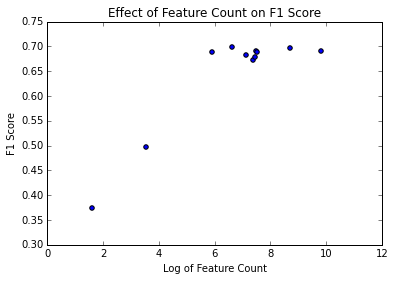

In [846]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

    ### STUDENT START ###
    for c in regularization_c:
        #################################################
        #l2 penalty -- all data points
        #single grams
        vectorizer = CountVectorizer()
        train_vec = vectorizer.fit_transform(train_data).toarray()
        dev_vec = vectorizer.transform(dev_data)

        #fit model
        LR_model = LogisticRegression(penalty="l2", C = c, tol=0.01)
        LR_model.fit(train_vec, train_labels)

        #model outputs
        df_features2 = LR_model.coef_ #LR model coefficents

        print "L2 penalty has " + str(np.count_nonzero(df_features2)) +" number of non-zero weights"
        #calcs the total number of items in the array of arrays...please bring back the PANDAS!!!
        #and the number of non-0's in that array & boom you have the total number of 0's
        #print df_features2.shape[0]*df_features2.shape[1] - np.count_nonzero(df_features2)

        ###################################################
        #model with L1 penalty --all data points
        #single grams
        vectorizer = CountVectorizer()
        train_vec = vectorizer.fit_transform(train_data).toarray()
        dev_vec = vectorizer.transform(dev_data)

        #fit model
        LR_model = LogisticRegression(penalty="l1", C = c, tol=0.01)
        LR_model.fit(train_vec, train_labels)

        #model outputs
        df_features2 = LR_model.coef_ #LR model coefficents

        #grab the features with NON 0 weighted features
        non_zero_features = np.argwhere(df_features2!=0)
        print "L1 penalty has " + str(np.count_nonzero(df_features2)) +" number of non-zero weights"
        feature_cnt.append(np.count_nonzero(df_features2))
        
        new_list = []
        #removing columns that have a total of 0, a rough work around...believe me I know
        #bring back the pandas!! df.loc[:, (df != 0).any(axis=0)]
        for entry_index in range(0,train_vec.shape[1]):
            #checkout if the features add to 0
            total = df_features2[:,entry_index].sum()
            if total != 0:
                new_list.append(entry_index)
            #print total
        #print new_list
        ##########################
        #prune word vector
        #grab all feature names
        feature_names = vectorizer.get_feature_names()
        #select just the feature names with non 0 totals for each class
        clean_names = [feature_names[match]for match in new_list]

        ######################################################
        #L2 SOME datapoints
        #single grams
        vectorizer = CountVectorizer()
        clean_vec = vectorizer.fit(clean_names)
        train_vec = clean_vec.transform(train_data).toarray()
        dev_vec = clean_vec.transform(dev_data)

        print np.shape(train_vec)

        #fit model
        LR_model = LogisticRegression(penalty="l2", C = c, tol=0.01)
        LR_model.fit(train_vec, train_labels)

        #makes predictions on the dev dataset with the model I just built
        dev_pred_labels = LR_model.predict(dev_vec)

        #accuracy Calcs (using f1 for multiclass problem + LR model)
        q6_f1 = metrics.f1_score(dev_pred_labels, dev_labels)
        print "Regularization weight: " + str(c) + str(q6_f1)
        accuracy.append(q6_f1)
    
    print accuracy
    print feature_cnt   
    #show relationship
    plt.scatter(np.log(feature_cnt), accuracy)
    plt.title('Effect of Feature Count on F1 Score')  
    plt.ylabel('F1 Score') 
    plt.xlabel('Log of Feature Count') 
    plt.show()

    ### STUDENT END ###
accuracy = []
feature_cnt = []
regularization_c =[0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99,1,10,100] # had to shift so it would run[0.0001, 
P6()



(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

[4 pts]

In [691]:
def P7():
    ### STUDENT START ###
    #length weighting vectorizing
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_train_vec = tfidf_vectorizer.fit_transform(train_data)
    dev_vec = tfidf_vectorizer.transform(dev_data)
    
    #vocab size
    print "With the TFIDF leveraged, the vocabulary size shrinks to : " + str(tfidf_train_vec.shape[1]) + "\n"
    
    #Model with no preprocessing 
    tfidf_LR_model = LogisticRegression(penalty="l2", C = 100)
    tfidf_LR_model.fit(tfidf_train_vec, train_labels)
    
    #makes predictions on the dev dataset with the model I just built
    tfidf_dev_pred_labels = tfidf_LR_model.predict(dev_vec)
    tfidf_dev_pred_probs = tfidf_LR_model.predict_proba(dev_vec)
                                
    max_probabilities =[] 
    denominator = []
    #look at all entries in the dev dataset
    for item in range(0,len(dev_data)):
        #find the max prob for each entry
        max_prob = np.max(tfidf_dev_pred_probs[item])
        max_probabilities.append(max_prob)
        #find the denominator for R
        label_prob = tfidf_dev_pred_probs[item,dev_labels[item]]
        denominator.append(label_prob)
        
    ##R = maximum predicted probability (selected label) / predicted probability of the correct label (prob of the real label); R = 1 if they match
    R = np.array(max_probabilities) / np.array(denominator)
    
    #flag records that are top 3
    top_3 = np.sort(R)[-3:] #:-1][::-1]
    
    #print out the most incorrect predictions
    for m in range(2,-1,-1):
        #finds the position on the entry in Dev data
        dev_location = [i for i,x in enumerate(R) if x == top_3[m]]
        #show the category
        print "Actual category: " + str(newsgroups_train.target_names[dev_labels[dev_location]])
        #show the predicted category
        print "Predicted category: " + str(newsgroups_train.target_names[tfidf_dev_pred_labels[dev_location]]) + "\n"
        #show the text for the message
        print "text: " + str(dev_data[dev_location[0]])+ "\n"
        print "--------------------------------------"
    

    ### STUDENT END ###
P7()

With the TFIDF leveraged, the vocabulary size shrinks to : 26879

Actual category: talk.religion.misc
Predicted category: comp.graphics

text: I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use. People can recuperate the
actual costs of printing (paper, copy center charges), but may not charge
anything for their time in making c

C:\Users\N0209810\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:41: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
C:\Users\N0209810\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:43: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


ANSWER: TfidfVectorizer -- how is this different from the CountVectorizer? The term frequency inverse document frequency weighs the importance of the features given the length of the overall message so that longer messages don't carry additional importance in the model just because they are longer. The model does not do a very good job of considering the associations between words, it would be cool to build a long short term memory model to adjust for some of those relationships, phrases like "book of Mormon" might be picked up on as much more significant. Maybe after 205! It would also be interesting to try and merge the model with some pretrained text like word2vec to see if more established vernacular could assist with the identification of false red flags such at email, internet, and ftp seen in a few of the examples above.

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

- [1 pt] for a reasonable attempt
- [2 pts] for improved performance